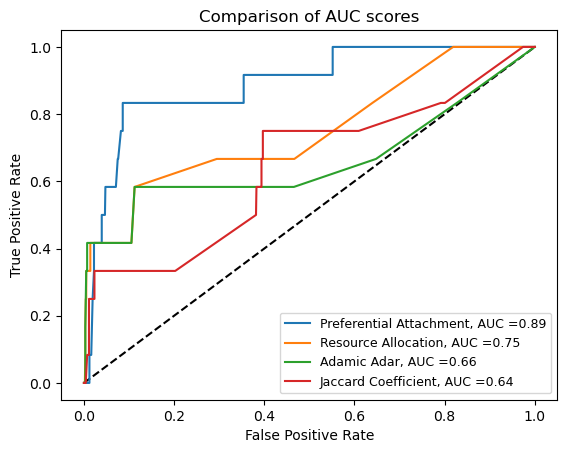

In [4]:

import pandas as pd
import networkx as nx
import numpy as np
import random
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Import dataset
df2 = pd.read_csv('Alliances.csv')
G = nx.from_pandas_edgelist(df2, 'Side_a', 'Side_b')


# The first similiarity index to analyze will be the Adamic Adar Index
# Set random seed
random.seed(10)
np.random.seed(10)


# Generate a test set of node pairs
def generate_test_set(G, size):
    test_set = []
    for i in range(size):
        node1 = random.choice(list(G.nodes()))
        node2 = random.choice(list(G.nodes()))
        test_set.append((node1, node2))
    return test_set

# Generate a test set of node pairs
test_set = generate_test_set(G, 1000)

# Calculate the Adamic-Adar index for each node pair in the test set
adamic_adar_scores = list(nx.adamic_adar_index(G, test_set))

# Prepare the features and labels for the classifier
X = [[score] for _, _, score in adamic_adar_scores]
y_true = [1 if G.has_edge(node1, node2) else 0 for node1, node2 in test_set]

# Create the neural network classifier
estimator = MLPClassifier(hidden_layer_sizes=(200,100,100,100), max_iter=500, solver='adam', random_state=10)

# Perform cross-validated predictions
y_scores = cross_val_predict(estimator, X, y_true, cv=5, method='predict_proba')[:, 1]

# Compute the false positive rate, true positive rate, and AUC
fpr_adamic, tpr_adamic, _ = roc_curve(y_true, y_scores)
adamic_auc_score = auc(fpr_adamic, tpr_adamic)


# The second similarity index to analyze will be Preferential Attachment
random.seed(10)
np.random.seed(10)

# Calculate the Preferential Attachment index for each node pair in the test set
pref_scores = list(nx.preferential_attachment(G, test_set))

# Prepare the features and labels for the classifier
X = [[score] for _, _, score in pref_scores]
y_true = [1 if G.has_edge(node1, node2) else 0 for node1, node2 in test_set]

# Create the neural network classifier
estimator = MLPClassifier(hidden_layer_sizes=(200,100,100,100,), max_iter=500, solver='adam', random_state=10)

# Perform cross-validated predictions
y_scores = cross_val_predict(estimator, X, y_true, cv=5, method='predict_proba')[:, 1]

# Compute the false positive rate, true positive rate, and AUC
fpr_pref, tpr_pref, _ = roc_curve(y_true, y_scores)
pref_auc_score = auc(fpr_pref, tpr_pref)



#The third similarity index will be the Jaccard Coefficient 
random.seed(10)
np.random.seed(10)

# Calculate the Jaccard Coefficient for each node pair in the test set
jaccard_scores = list(nx.jaccard_coefficient(G, test_set))

# Prepare the features and labels for the classifier
X = [[score] for _, _, score in jaccard_scores]
y_true = [1 if G.has_edge(node1, node2) else 0 for node1, node2 in test_set]

# Create the neural network classifier
estimator = MLPClassifier(hidden_layer_sizes=(200,100,100,100), max_iter=500, solver='adam',random_state=10)
# Perform cross-validated predictions
y_scores = cross_val_predict(estimator, X, y_true, cv=5, method='predict_proba')[:, 1]

# Compute the false positive rate, true positive rate, and AUC
fpr_jaccard, tpr_jaccard, _ = roc_curve(y_true, y_scores)
jaccard_auc_score = auc(fpr_jaccard, tpr_jaccard)


# The fourth similarity index will be the Resource Allocation index.
random.seed(10)
np.random.seed(10)


# Calculate the Resource Allocation index for each node pair in the test set
ra_scores = list(nx.resource_allocation_index(G, test_set))

# Prepare the features and labels for the classifier
X = [[score] for _, _, score in ra_scores]
y_true = [1 if G.has_edge(node1, node2) else 0 for node1, node2 in test_set]

# Create the neural network classifier
estimator = MLPClassifier(hidden_layer_sizes=(200,100,100,100), max_iter=500, solver='adam', random_state=10)
# Perform cross-validated predictions
y_scores = cross_val_predict(estimator, X, y_true, cv=5, method='predict_proba')[:, 1]

# Compute the false positive rate, true positive rate, and AUC
fpr_ra, tpr_ra, _ = roc_curve(y_true, y_scores)
ra_auc_score = auc(fpr_ra, tpr_ra)

#Now I will plot all the AUC scores together.

plt.figure(0).clf()
RA = round(ra_auc_score,2)
Adamic = round(adamic_auc_score,2)
Jaccard = round(jaccard_auc_score,2)
Pref = round(pref_auc_score,2)
plt.title("Comparison of AUC scores")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_pref, tpr_pref, label ="Preferential Attachment, AUC =" + str(Pref))
plt.plot(fpr_ra, tpr_ra, label="Resource Allocation, AUC =" + str(RA))
plt.plot(fpr_adamic,tpr_adamic, label ="Adamic Adar, AUC =" + str(Adamic))
plt.plot(fpr_jaccard, tpr_jaccard, label ="Jaccard Coefficient, AUC =" + str(Jaccard))



plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0, fontsize=9)
plt.savefig('AUC scores.png', dpi=300)
